We use Keras and different MLP(deep neural network architechtures) architechtures to build the number detection classifer 

In [16]:
#to suppress all warining messages
import warnings
warnings.filterwarnings("ignore")

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


we import matplotlib and define a plotting function which plots train loss and test loss with epochs 
while training and testing the module

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

# source ::: https://stackoverflow.com/a/14434334https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
#70000 data points are present in the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[0], X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[0], X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (60000, 784)
Number of test examples : 10000 and each image is of shape (10000, 784)


In [6]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [7]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs because we use softmax classifier later in the MLP
# np_utils do that for us

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#we import libraries needed to stack neural layels and build a model 
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [10]:
# we define some model parameters which we use repeatedly in model contruction
# total no of output cases possible (0,2,3,4,5,6,7,8,9)
output_dim = 10
#no of features of our input data(image)
input_dim = X_train.shape[1]
#no of data points injected into neural network while training the model
batch_size = 128 
#no of epochs 
nb_epoch = 20

# MLP + Sigmoid activation + ADAM

we build a 4 layerd network with 3hidden layers and one output layer with  softmax activation 

In [11]:
# start building a  Multilayer perceptron (multi layered neural network)

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 485,386
Trainable params: 485,386
Non-trainable params: 0
_________________________________________________________________


Her we can see the dimentions of weights of each layer 

In [12]:
#here we compile the module, we mention type of optimiser needed and themetrics to be returned and the type of loss 
#we needed to  use in back-propagation
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#fitting the model will train the model for all the epochs abd train data and also perform , test validations
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.6479 - acc: 0.8257 - val_loss: 0.2554 - val_acc: 0.9262
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.2116 - acc: 0.9392 - val_loss: 0.1718 - val_acc: 0.9492
Epoch 3/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1462 - acc: 0.9568 - val_loss: 0.1325 - val_acc: 0.9615
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1116 - acc: 0.9671 - val_loss: 0.1070 - val_acc: 0.9678
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0872 - acc: 0.9742 - val_loss: 0.0918 - val_acc: 0.9720
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0681 - acc: 0.9800 - val_loss: 0.0837 - val_acc: 0.9731
Epoch 7/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0555 - acc: 0.9833 - val_loss: 0.0895 -

Test score: 0.08413005021255812
Test accuracy: 0.9802


<IPython.core.display.Javascript object>


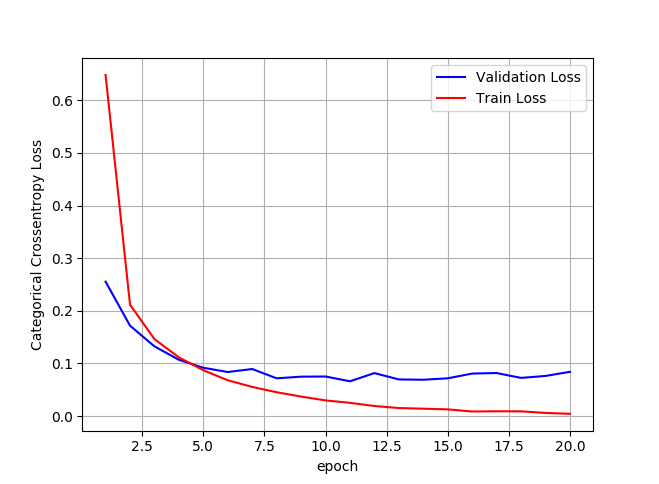

In [14]:
#we get the test score and accuracy from the model 
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#contains list of all epochas
x = list(range(1,nb_epoch+1))

#vy has validation loss for each epoch
vy = history.history['val_loss']

#ty has train loss for each epoch
ty = history.history['loss']

# function that plots the graphs between losses and epochs
plt_dynamic(x, vy, ty, ax)

We can see that the validation-loss is almost stabilised after 10 epochs and after 20 epochs 
both losses diverging away from each other so we may stop our training here as our model could over fit if we continue to train
further.we can also see that test loss touched down 0.1 under 5 epochs which is a sign for faster convergence.

<IPython.core.display.Javascript object>


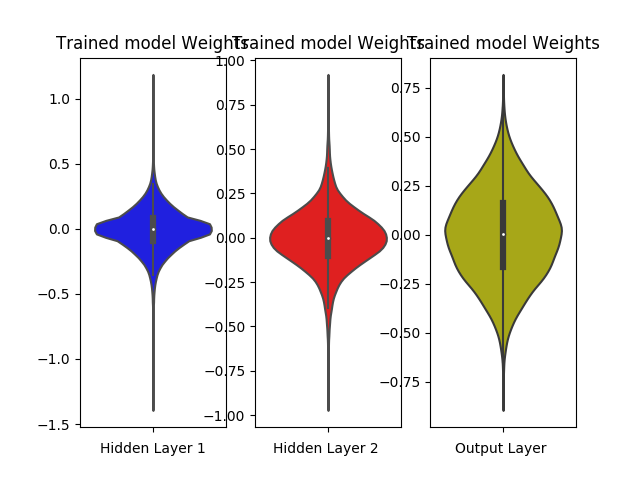

In [17]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

here we can see that weights are having gaussian distribution and values are between -0.5 to 0.5

# 5 MLP + relu activation + sgd  + Batch normalisation

In [19]:
#importing BatchnormaliZation function from keras 
from keras.layers.normalization import BatchNormalization

In [20]:
#we use He initialisation for weights as all are relu activations
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in+1) = 0.062  => N(0,σ) = N(0,0.062) ==> fan_in = √2/512+1
# h2 =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125) ==> fan_in = √2/128+1
# h1 =>  σ=√(2/(fan_in+1) = 0.062  => N(0,σ) = N(0,0.062) ==> fan_in = √2/512+1
# h2 =>  σ=√(2/(fan_in+1) = 0.125  => N(0,σ) = N(0,0.125) ==> fan_in = √2/128+1
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)
# He Normal initialization.

784 ->512->128->512->batchnorm->128->10

In [21]:


model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
#======================================================================================================
model_batch.add(BatchNormalization())  #batch normalisation
#===============================================================================================
model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               66048     
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 602,634
Trainable params: 601,610
Non-trainable params: 1,024
_________________________________________________________________


In [22]:
model_batch.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.4851 - acc: 0.8543 - val_loss: 0.2412 - val_acc: 0.9276
Epoch 2/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.2031 - acc: 0.9392 - val_loss: 0.1867 - val_acc: 0.9421
Epoch 3/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.1531 - acc: 0.9546 - val_loss: 0.1617 - val_acc: 0.9515
Epoch 4/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1259 - acc: 0.9626 - val_loss: 0.1444 - val_acc: 0.9560
Epoch 5/20
60000/60000 [==============================] - 9s 147us/step - loss: 0.1067 - acc: 0.9690 - val_loss: 0.1333 - val_acc: 0.9592
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0926 - acc: 0.9734 - val_loss: 0.1243 - val_acc: 0.9619
Epoch 7/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0817 - acc: 0.9768 - val_loss: 0.1212 

Test score: 0.09766465545422398
Test accuracy: 0.971


<IPython.core.display.Javascript object>


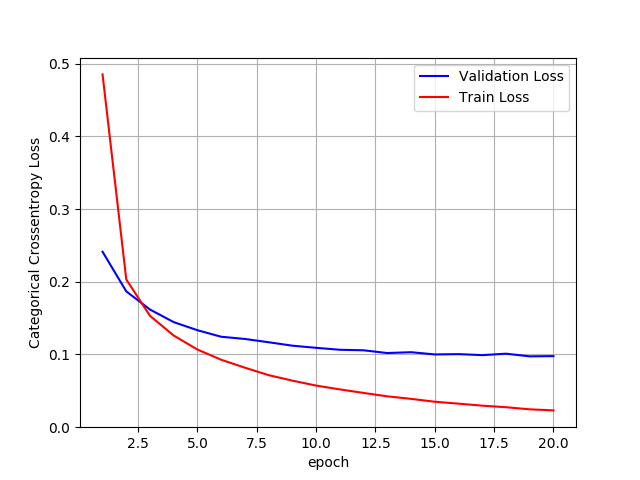

In [23]:
#we get the test score and accuracy from the model 
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#contains list of all epochas
x = list(range(1,nb_epoch+1))

#vy has validation loss for each epoch
vy = history.history['val_loss']

#ty has train loss for each epoch
ty = history.history['loss']

# function that plots the graphs between losses and epochs
plt_dynamic(x, vy, ty, ax)

here we can clearly with SGD that test loss took 12.5 epocks to coverge under 0.1, even with batch normalisationa 
and 2 extra layers first model converged faster than this model

<IPython.core.display.Javascript object>


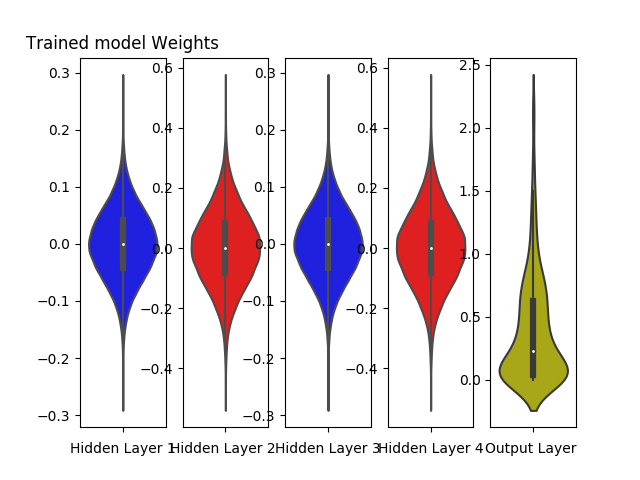

In [26]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)

ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)

ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 5, 4)

ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 5, 5)

ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

here also the weights are gaussian distributions but the weights are under 0.2 ,except for output layer which is right skewed

In [ ]:
# 7 MLP + relu activation + sigmoid + adam  + Batch normalisation

In [28]:
#we import drop outs from the keras
from keras.layers import Dropout

In [ ]:
#we useXavier/Glorot Normal initialization.
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
#for example
# h1 =>  σ=√(2/(fan_in+fan_out+1)  = √ 2/(512+200) = 0.052  => N(0,σ) = N(0,0.052) 
# h2 =>  σ=√(2/(fan_in+fan_out+1)  = √ 2/(200+512) = 0.052  => N(0,σ) = N(0,0.052) 


In [32]:
model_batch_drop = Sequential()

model_batch_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_batch_drop.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
######################################
model_batch_drop.add(Dropout(0.5))
####################################
model_batch_drop.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
#======================================================================================================
model_batch_drop.add(BatchNormalization())  #batch normalisation
#===============================================================================================
model_batch_drop.add(Dense(200, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.052, seed=None)) )
######################################
model_batch_drop.add(Dropout(0.5))
####################################
model_batch_drop.add(Dense(512, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.052, seed=None)) )
#======================================================================================================
model_batch_drop.add(BatchNormalization())  #batch normalisation
#===============================================================================================
model_batch_drop.add(Dense(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.25, seed=None)) )
model_batch_drop.add(Dense(output_dim, activation='softmax'))


model_batch_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_32 (Dense)             (None, 100)               51300     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)               51712     
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_34 (Dense)             (None, 200)               102600    
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
__________

In [35]:
model_batch_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 359us/step - loss: 0.9302 - acc: 0.7676 - val_loss: 0.2088 - val_acc: 0.9436
Epoch 2/20
60000/60000 [==============================] - 17s 291us/step - loss: 0.2980 - acc: 0.9168 - val_loss: 0.1371 - val_acc: 0.9606
Epoch 3/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.2079 - acc: 0.9419 - val_loss: 0.1196 - val_acc: 0.9653
Epoch 4/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.1583 - acc: 0.9554 - val_loss: 0.0990 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.1339 - acc: 0.9627 - val_loss: 0.1014 - val_acc: 0.9710
Epoch 6/20
60000/60000 [==============================] - 18s 303us/step - loss: 0.1118 - acc: 0.9689 - val_loss: 0.0954 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 18s 301us/step - loss: 0.1015 - acc: 0.9706 - val_loss: 0.

Test score: 0.08494389820655342
Test accuracy: 0.9802


<IPython.core.display.Javascript object>


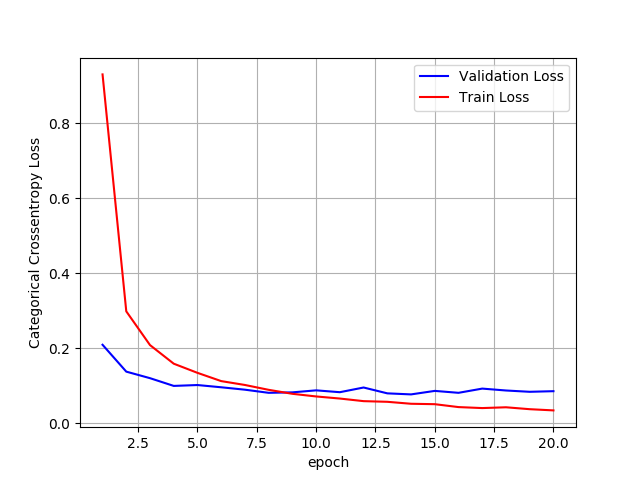

In [36]:
#we get the test score and accuracy from the model 
score = model_batch_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#contains list of all epochas
x = list(range(1,nb_epoch+1))

#vy has validation loss for each epoch
vy = history.history['val_loss']

#ty has train loss for each epoch
ty = history.history['loss']

# function that plots the graphs between losses and epochs
plt_dynamic(x, vy, ty, ax)

here we can see that tha convergence rate faster that the above three models, with just one epoch test validation loss 
touched down 0.1 


#conclusions:
1)almost all models gave high test accuracy(97-99%)
2)with increase in layers time taken to train will also dramatically increase and too many layers is unncessary for this model
  since we can achieve high accuracy with less layers.
3)ADAM optimiser models significantly converge faster that the Model using SGD optimiser 
4)here batch normalisation and initialisation methods and dropouts has not shown any significant 
  improvements in the performance of the model as model is working fine without them.